# WOOK LEE, JUNSEOK PARK
# INTRO TO DATA SCIENCE PROJECT

# how to use jupyter notebook
* Shift + Enter to run the cell and cursor automatically moves to the next cell
* press a to create a cell above
* press b to create a cell below
* pres dd to delete the cell
* press m to change the cell format to markdown
* press y to change the cell format to code

# LOAD THE STARBUCKS DATASET

We'll start by loading the Starbucks dataset into a Pandas DataFrame to examine its structure and the types of data it contains.

In [55]:
%ls

ds_project.ipynb        starbucks.csv
dunkin.csv              starbucks_modified.csv


In [56]:
# importing pandas library
import pandas as pd

In [57]:
# load starbucks.csv file and store to starbucks_data
starbucks_data = pd.read_csv("starbucks.csv")
starbucks_data.shape

# 242 rows and 18 columns

(242, 18)

In [58]:
# head() can let you preview the starbucks data
starbucks_data.head()

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10%,0%,20%,0%,75


In [59]:
starbucks_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Beverage_category          242 non-null    object 
 1   Beverage                   242 non-null    object 
 2   Beverage_prep              242 non-null    object 
 3   Calories                   242 non-null    int64  
 4    Total Fat (g)             242 non-null    object 
 5   Trans Fat (g)              242 non-null    float64
 6   Saturated Fat (g)          242 non-null    float64
 7    Sodium (mg)               242 non-null    int64  
 8    Total Carbohydrates (g)   242 non-null    int64  
 9   Cholesterol (mg)           242 non-null    int64  
 10   Dietary Fibre (g)         242 non-null    int64  
 11   Sugars (g)                242 non-null    int64  
 12   Protein (g)               242 non-null    float64
 13  Vitamin A (% DV)           242 non-null    object 

# DATA PREPROCESSING
We'll clean the dataset by handling any inconsistencies, missing values, and outliers to prepare it for analysis.

In [60]:
# Replace "Varies" with NaN to allow for median calculation, then convert the column to numeric
starbucks_data['Caffeine (mg)'] = pd.to_numeric(starbucks_data['Caffeine (mg)'].replace('Varies', pd.NA), errors='coerce')

# Fill in NaN values (including those that were originally "Varies") with the median of the column
starbucks_data['Caffeine (mg)'] = starbucks_data['Caffeine (mg)'].fillna(starbucks_data['Caffeine (mg)'].median())

# Ensure there are no more missing values
missing_values_cleaned = starbucks_data.isnull().sum()

# Display the dataset's first few rows to confirm the cleanup
display_cleaned = {
    "no_more_missing_values": missing_values_cleaned[missing_values_cleaned > 0],
    "first_few_rows_after_cleaning": starbucks_data.head()
}



display_cleaned


{'no_more_missing_values': Series([], dtype: int64),
 'first_few_rows_after_cleaning':          Beverage_category       Beverage      Beverage_prep  Calories  \
 0                   Coffee  Brewed Coffee              Short         3   
 1                   Coffee  Brewed Coffee               Tall         4   
 2                   Coffee  Brewed Coffee             Grande         5   
 3                   Coffee  Brewed Coffee              Venti         5   
 4  Classic Espresso Drinks    Caffè Latte  Short Nonfat Milk        70   
 
    Total Fat (g)  Trans Fat (g)   Saturated Fat (g)   Sodium (mg)  \
 0            0.1             0.0                0.0             0   
 1            0.1             0.0                0.0             0   
 2            0.1             0.0                0.0             0   
 3            0.1             0.0                0.0             0   
 4            0.1             0.1                0.0             5   
 
     Total Carbohydrates (g)   Cholester

In [61]:
# Strip leading and trailing spaces from column names
starbucks_data.columns = starbucks_data.columns.str.strip()

# Print the column names of the DataFrame
print(starbucks_data.columns.tolist())


['Beverage_category', 'Beverage', 'Beverage_prep', 'Calories', 'Total Fat (g)', 'Trans Fat (g)', 'Saturated Fat (g)', 'Sodium (mg)', 'Total Carbohydrates (g)', 'Cholesterol (mg)', 'Dietary Fibre (g)', 'Sugars (g)', 'Protein (g)', 'Vitamin A (% DV)', 'Vitamin C (% DV)', 'Calcium (% DV)', 'Iron (% DV)', 'Caffeine (mg)']


# Data Visualization
We'll create various graphs and charts to visually represent our findings, focusing on the distribution of calories, fat, carbohydrates, protein, and sugar content across different menu items.

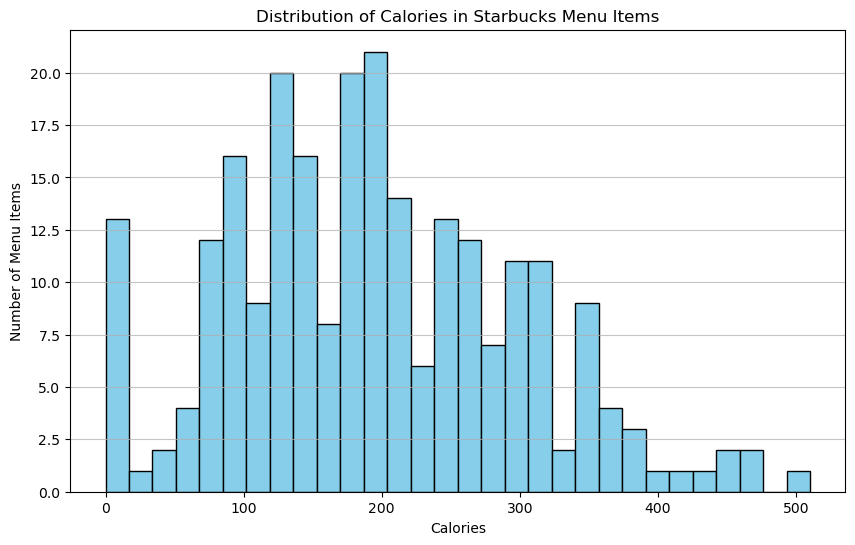

In [62]:
import matplotlib.pyplot as plt

# Histogram of calorie distribution
plt.figure(figsize=(10, 6))
plt.hist(starbucks_data['Calories'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Calories in Starbucks Menu Items')
plt.xlabel('Calories')
plt.ylabel('Number of Menu Items')
plt.grid(axis='y', alpha=0.75)

plt.show()

# Beverage Categories in Descending order based on specfic nutritional elements

## Total Fat (g)

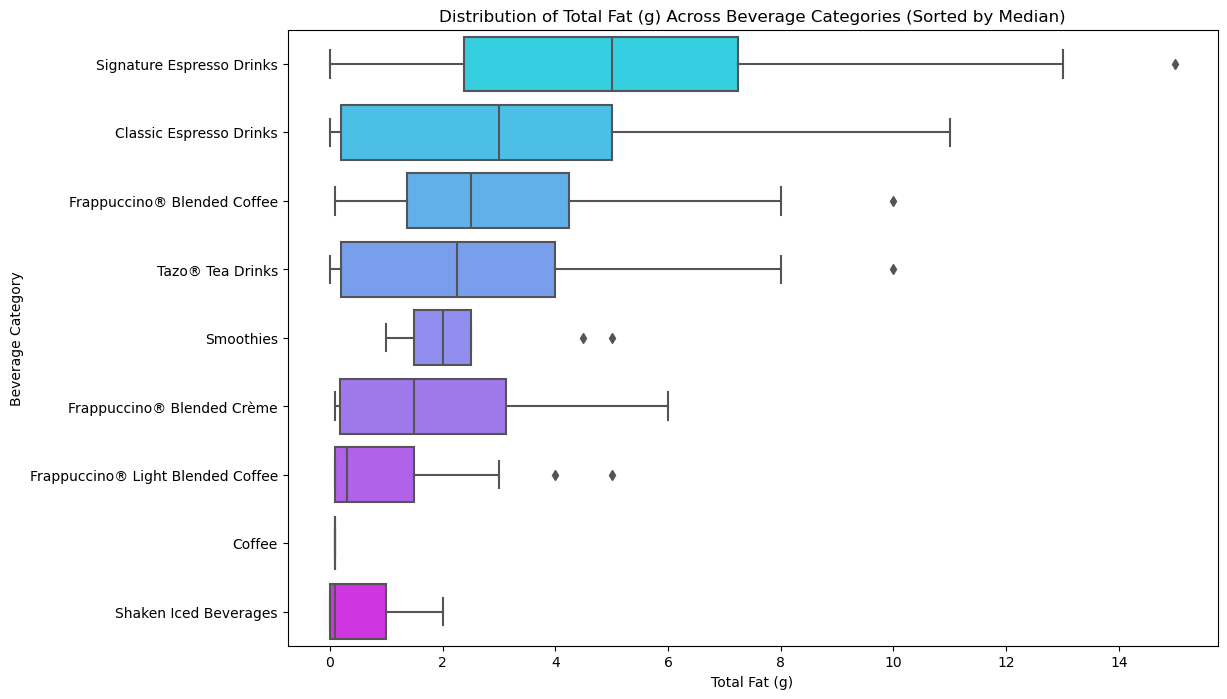

In [63]:
import seaborn as sns

starbucks_data['Total Fat (g)'] = pd.to_numeric(starbucks_data['Total Fat (g)'], errors='coerce')

# Calculate the median 'Total Fat (g)' for each beverage category
median_fat = starbucks_data.groupby('Beverage_category')['Total Fat (g)'].median()

# Sort categories in descending order of their median 'Total Fat (g)'
sorted_categories = median_fat.sort_values(ascending=False).index

# Generate the box plot for 'Total Fat (g)' with categories sorted by descending median values
plt.figure(figsize=(12, 8))
sns.boxplot(x='Total Fat (g)', y='Beverage_category', data=starbucks_data, palette='cool', order=sorted_categories)
plt.title('Distribution of Total Fat (g) Across Beverage Categories (Sorted by Median)')
plt.xlabel('Total Fat (g)')
plt.ylabel('Beverage Category')
plt.show()

In [64]:
# Sort the dataset by 'Total Fat (g)' in descending order
sorted_by_fat = starbucks_data.sort_values(by='Total Fat (g)', ascending=False)

# Get the beverage with the highest fat content
highest_fat_beverage = sorted_by_fat.iloc[0]

# Get the beverage with the lowest fat content (excluding zero or missing fat content)
lowest_fat_beverage = sorted_by_fat[sorted_by_fat['Total Fat (g)'] > 0].iloc[-1]

highest_fat_beverage_details = {
    "Beverage": highest_fat_beverage['Beverage'],
    "Beverage Category": highest_fat_beverage['Beverage_category'],
    "Total Fat (g)": highest_fat_beverage['Total Fat (g)']
}

lowest_fat_beverage_details = {
    "Beverage": lowest_fat_beverage['Beverage'],
    "Beverage Category": lowest_fat_beverage['Beverage_category'],
    "Total Fat (g)": lowest_fat_beverage['Total Fat (g)']
}

highest_fat_beverage_details, lowest_fat_beverage_details


({'Beverage': 'White Chocolate Mocha (Without Whipped Cream)',
  'Beverage Category': 'Signature Espresso Drinks',
  'Total Fat (g)': 15.0},
 {'Beverage': 'Iced Brewed Coffee (With Classic Syrup)',
  'Beverage Category': 'Shaken Iced Beverages',
  'Total Fat (g)': 0.1})

In [65]:
# Find the maximum value of 'Total Fat (g)'
max_fat = starbucks_data['Total Fat (g)'].max()
min_fat = starbucks_data['Total Fat (g)'].min()

# Filter the dataset for beverages with the maximum 'Total Fat (g)'
highest_fat_beverages = starbucks_data[starbucks_data['Total Fat (g)'] == max_fat]

# Filter the dataset for beverages with the minimum 'Total Fat (g)' 
lowest_fat_beverages = starbucks_data[starbucks_data['Total Fat (g)'] == min_fat]

# Number of beverages with the highest and lowest total fat
num_highest_fat_beverages = len(highest_fat_beverages)
num_lowest_fat_beverages = len(lowest_fat_beverages)


print(num_highest_fat_beverages, num_lowest_fat_beverages)
print(highest_fat_beverages["Beverage"])
print(lowest_fat_beverages["Beverage"])

# duplicates exist because of different sizings of beverages

1 21
84    White Chocolate Mocha (Without Whipped Cream)
Name: Beverage, dtype: object
40                                       Caffè Americano
41                                       Caffè Americano
42                                       Caffè Americano
43                                       Caffè Americano
56                                              Espresso
57                                              Espresso
98           Caramel Apple Spice (Without Whipped Cream)
99           Caramel Apple Spice (Without Whipped Cream)
100          Caramel Apple Spice (Without Whipped Cream)
101          Caramel Apple Spice (Without Whipped Cream)
102                                            Tazo® Tea
103                                            Tazo® Tea
104                                            Tazo® Tea
105                                            Tazo® Tea
154              Iced Brewed Coffee (With Classic Syrup)
166           Shaken Iced Tazo® Tea (With Classic Syrup)
1

## Total Carbohydrates (g)

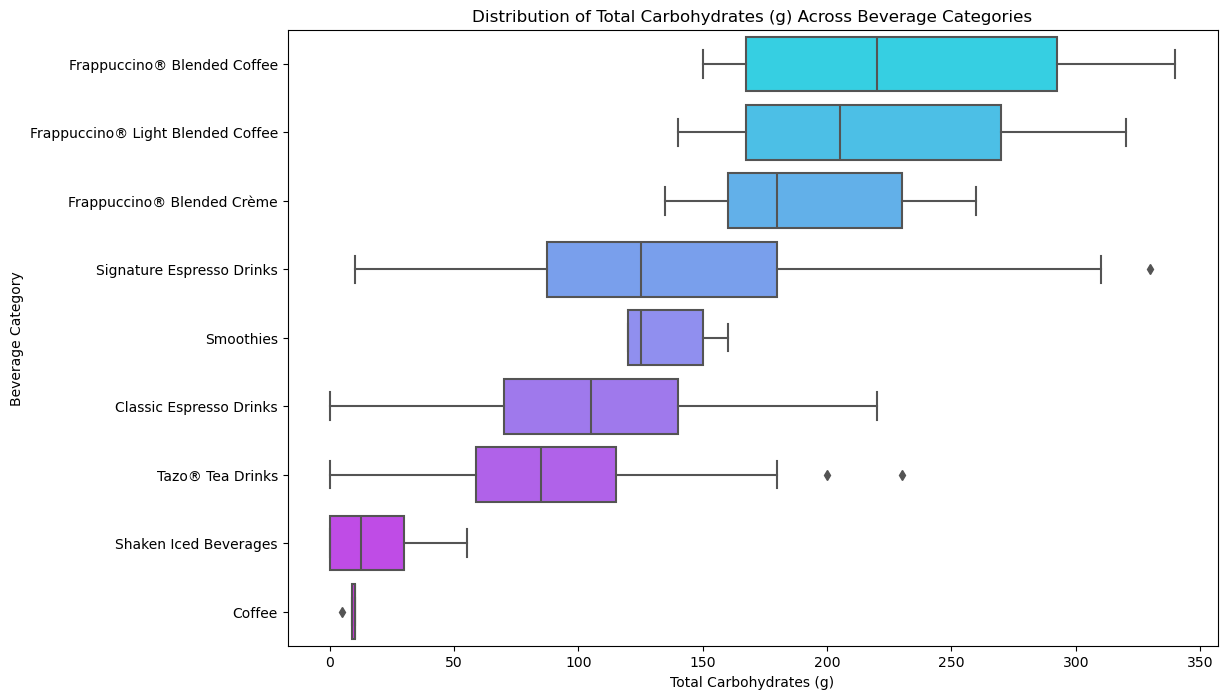

In [66]:

median_carbs = starbucks_data.groupby('Beverage_category')['Total Carbohydrates (g)'].median()
sorted_categories = median_carbs.sort_values(ascending=False).index

plt.figure(figsize=(12, 8))
sns.boxplot(x='Total Carbohydrates (g)', y='Beverage_category', data=starbucks_data, palette='cool', order=sorted_categories)
plt.title('Distribution of Total Carbohydrates (g) Across Beverage Categories')
plt.xlabel('Total Carbohydrates (g)')
plt.ylabel('Beverage Category')
plt.show()

In [67]:
# Find the maximum value of 'Total Carbohydrates (g)'
max_carbs = starbucks_data['Total Carbohydrates (g)'].max()
min_carbs = starbucks_data['Total Carbohydrates (g)'].min()

# Filter the dataset for beverages with the maximum 'Total Carbohydrates (g)'
highest_carbs_beverages = starbucks_data[starbucks_data['Total Carbohydrates (g)'] == max_carbs]

# Filter the dataset for beverages with the minimum 'Total Carbohydrates (g)' 
lowest_carbs_beverages = starbucks_data[starbucks_data['Total Carbohydrates (g)'] == min_carbs]

# Number of beverages with the highest and lowest total Carbohydrates
num_highest_carbs_beverages = len(highest_carbs_beverages)
num_lowest_carbs_beverages = len(lowest_carbs_beverages)


print(num_highest_carbs_beverages, num_lowest_carbs_beverages)
print(highest_carbs_beverages["Beverage"])
print(lowest_carbs_beverages["Beverage"])

# duplicates exist because of different sizings of beverages

2 11
214    Java Chip (Without Whipped Cream)
215    Java Chip (Without Whipped Cream)
Name: Beverage, dtype: object
56                                              Espresso
102                                            Tazo® Tea
103                                            Tazo® Tea
104                                            Tazo® Tea
105                                            Tazo® Tea
166           Shaken Iced Tazo® Tea (With Classic Syrup)
167           Shaken Iced Tazo® Tea (With Classic Syrup)
168           Shaken Iced Tazo® Tea (With Classic Syrup)
169    Shaken Iced Tazo® Tea Lemonade (With Classic S...
170    Shaken Iced Tazo® Tea Lemonade (With Classic S...
171    Shaken Iced Tazo® Tea Lemonade (With Classic S...
Name: Beverage, dtype: object


## Protein (g)

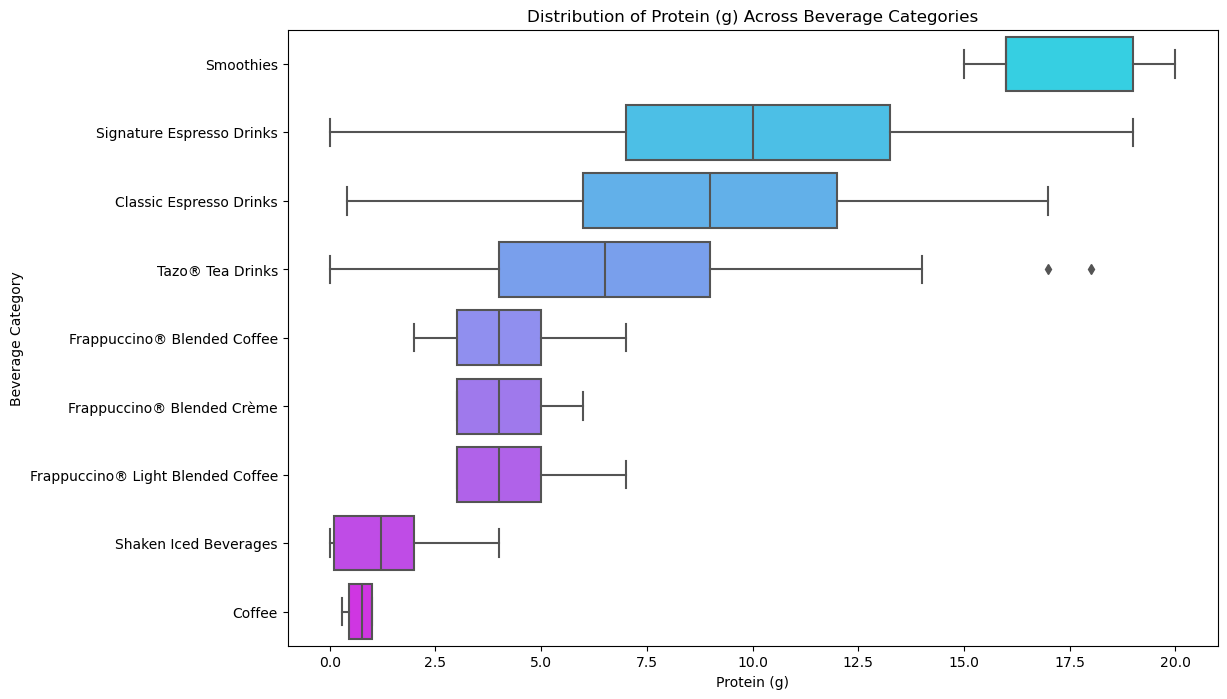

In [68]:
median_protein = starbucks_data.groupby('Beverage_category')['Protein (g)'].median()
sorted_categories = median_protein.sort_values(ascending=False).index

plt.figure(figsize=(12, 8))
sns.boxplot(x='Protein (g)', y='Beverage_category', data=starbucks_data, palette='cool', order=sorted_categories)
plt.title('Distribution of Protein (g) Across Beverage Categories')
plt.xlabel('Protein (g)')
plt.ylabel('Beverage Category')
plt.show()


In [69]:
# Find the maximum value of 'Total Protein (g)'
max_protein = starbucks_data['Protein (g)'].max()
min_protein = starbucks_data['Protein (g)'].min()

# Filter the dataset for beverages with the maximum 'Total Protein (g)'
highest_protein_beverages = starbucks_data[starbucks_data['Protein (g)'] == max_protein]

# Filter the dataset for beverages with the minimum 'Total Protein (g)' 
lowest_protein_beverages = starbucks_data[starbucks_data['Protein (g)'] == min_protein]

# Number of beverages with the highest and lowest total Protein
num_highest_protein_beverages = len(highest_protein_beverages)
num_lowest_protein_beverages = len(lowest_protein_beverages)


print(num_highest_protein_beverages, num_lowest_protein_beverages)
print(highest_protein_beverages["Beverage"])
print(lowest_protein_beverages["Beverage"])

# duplicates exist because of different sizings of beverages

2 11
172    Banana Chocolate Smoothie
173    Banana Chocolate Smoothie
Name: Beverage, dtype: object
98     Caramel Apple Spice (Without Whipped Cream)
99     Caramel Apple Spice (Without Whipped Cream)
100    Caramel Apple Spice (Without Whipped Cream)
101    Caramel Apple Spice (Without Whipped Cream)
102                                      Tazo® Tea
103                                      Tazo® Tea
104                                      Tazo® Tea
105                                      Tazo® Tea
166     Shaken Iced Tazo® Tea (With Classic Syrup)
167     Shaken Iced Tazo® Tea (With Classic Syrup)
168     Shaken Iced Tazo® Tea (With Classic Syrup)
Name: Beverage, dtype: object


## Sugar

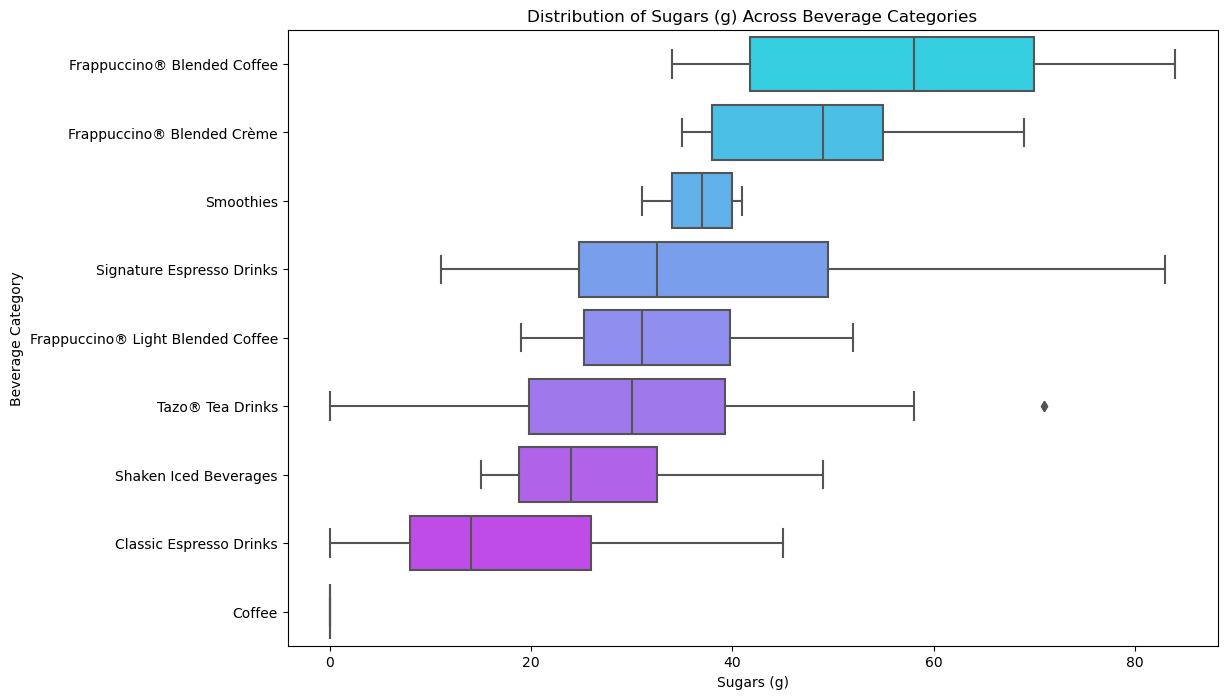

In [70]:
median_sugar = starbucks_data.groupby('Beverage_category')['Sugars (g)'].median()
sorted_categories = median_sugar.sort_values(ascending=False).index

plt.figure(figsize=(12, 8))
sns.boxplot(x='Sugars (g)', y='Beverage_category', data=starbucks_data, palette='cool', order=sorted_categories)
plt.title('Distribution of Sugars (g) Across Beverage Categories')
plt.xlabel('Sugars (g)')
plt.ylabel('Beverage Category')
plt.show()


In [71]:
# Find the maximum value of 'Sugars (g)'
max_sugars = starbucks_data['Sugars (g)'].max()
min_sugars = starbucks_data['Sugars (g)'].min()

# Filter the dataset for beverages with the maximum 'Sugars (g)'
highest_sugars_beverages = starbucks_data[starbucks_data['Sugars (g)'] == max_sugars]

# Filter the dataset for beverages with the minimum 'Total Sugars (g)' 
lowest_sugars_beverages = starbucks_data[starbucks_data['Sugars (g)'] == min_sugars]

# Number of beverages with the highest and lowest total Protein
num_highest_sugars_beverages = len(highest_sugars_beverages)
num_lowest_sugars_beverages = len(lowest_sugars_beverages)


print(num_highest_sugars_beverages, num_lowest_sugars_beverages)
print(highest_sugars_beverages["Beverage"])
print(lowest_sugars_beverages["Beverage"])

# duplicates exist because of different sizings of beverages

2 14
214    Java Chip (Without Whipped Cream)
215    Java Chip (Without Whipped Cream)
Name: Beverage, dtype: object
0        Brewed Coffee
1        Brewed Coffee
2        Brewed Coffee
3        Brewed Coffee
40     Caffè Americano
41     Caffè Americano
42     Caffè Americano
43     Caffè Americano
56            Espresso
57            Espresso
102          Tazo® Tea
103          Tazo® Tea
104          Tazo® Tea
105          Tazo® Tea
Name: Beverage, dtype: object


# Representation as Bar charts with subplots

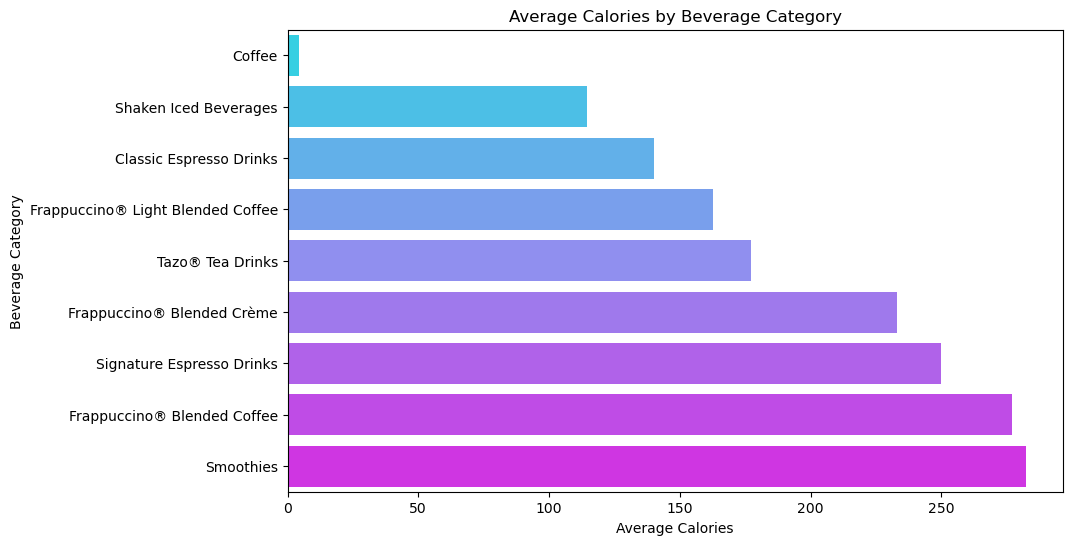

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'starbucks_data' is your DataFrame name and it's correctly prepared
# Calculate the average nutritional content by beverage category
average_nutritional_content = starbucks_data.groupby('Beverage_category', as_index=False).mean(numeric_only=True)

# Plotting the average calories by beverage category
plt.figure(figsize=(10, 6))
sns.barplot(x='Calories', y='Beverage_category', data=average_nutritional_content.sort_values('Calories'), palette='cool')
plt.title('Average Calories by Beverage Category')
plt.xlabel('Average Calories')
plt.ylabel('Beverage Category')
plt.show()


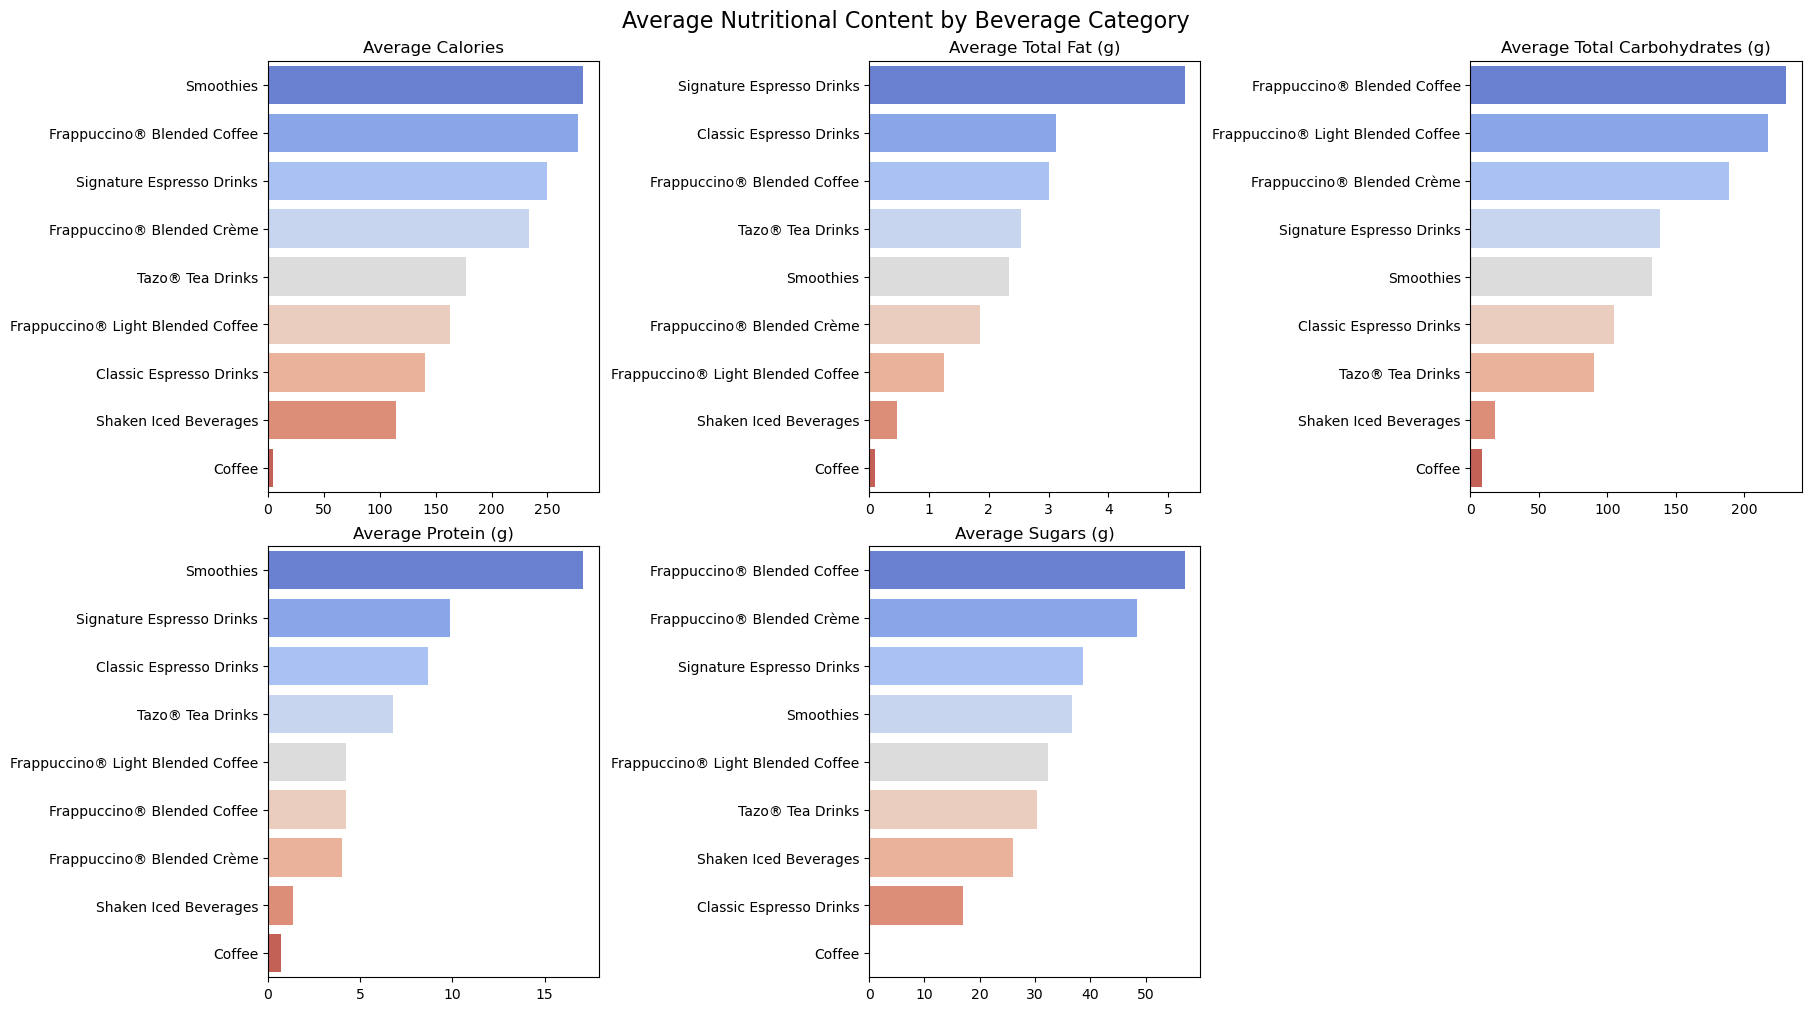

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size and layout
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10), constrained_layout=True)
fig.suptitle('Average Nutritional Content by Beverage Category', fontsize=16)

# List of nutritional elements and their respective axis
nutritional_elements = ['Calories', 'Total Fat (g)', 'Total Carbohydrates (g)', 'Protein (g)', 'Sugars (g)']
axes_list = [axes[0, 0], axes[0, 1], axes[0, 2], axes[1, 0], axes[1, 1]]

# Plot each nutritional element in its subplot
for ax, nutrient in zip(axes_list, nutritional_elements):
    sns.barplot(ax=ax, x=nutrient, y='Beverage_category', data=average_nutritional_content.sort_values(nutrient, ascending=False), palette='coolwarm')
    ax.set_title(f'Average {nutrient}')
    ax.set_xlabel('')
    ax.set_ylabel('')

# Hide the last subplot (if not used)
axes[1, 2].set_visible(False)

plt.show()


# Health Index Creation
* we will focus on calories, total fat, sugars, and protein. We'll normalize these values to a 0-1 scale
* Higher Values represent Healtheir

* Health Index will is calculated for each Starbucks menu item, based on the selected nutritional parameters (calories, total fat, sugars, protein) with each parameter normalized to a 0-1 scale and weighted equally for simplicity.
* Lower values for calories, total fat, sugars are considered healtheir, wheras higher values for protein are preferred.


In [74]:
from sklearn.preprocessing import MinMaxScaler

# Selecting nutritional parameters
nutritional_params = ['Calories', 'Total Fat (g)', 'Sugars (g)', 'Protein (g)']
health_data = starbucks_data[nutritional_params]

# Normalizing the values to a 0-1 range
scaler = MinMaxScaler()
normalized_health_data = scaler.fit_transform(health_data)
normalized_health_data = pd.DataFrame(normalized_health_data, columns=nutritional_params)

# Invert values for Calories, Total Fat, and Sugars as lower values are healthier
# For Protein, higher values are considered healthier, so we keep them as is
normalized_health_data['Calories'] = 1 - normalized_health_data['Calories']
normalized_health_data['Total Fat (g)'] = 1 - normalized_health_data['Total Fat (g)']
normalized_health_data['Sugars (g)'] = 1 - normalized_health_data['Sugars (g)']

# Assume equal weights for simplicity, but these can be adjusted based on dietary preferences
weights = {'Calories': 0.25, 'Total Fat (g)': 0.25, 'Sugars (g)': 0.25, 'Protein (g)': 0.25}

# Calculate the Health Index
health_index = normalized_health_data.mul(weights).sum(axis=1)

# Add the Health Index back to the original dataframe
starbucks_data['Health Index'] = health_index

# Order the DataFrame by the Health Index in descending order to see the healthiest options first
ordered_by_health_index = starbucks_data.sort_values(by='Health Index', ascending=False)

# Display the first few rows of the ordered DataFrame
ordered_by_health_index[['Beverage_category', 'Beverage', 'Health Index']].head(50)





,Beverage_category,Beverage,Health Index
61,Classic Espresso Drinks,Skinny Latte (Any Flavour),0.791569
13,Classic Espresso Drinks,Caffè Latte,0.791548
10,Classic Espresso Drinks,Caffè Latte,0.790203
60,Classic Espresso Drinks,Skinny Latte (Any Flavour),0.788557
7,Classic Espresso Drinks,Caffè Latte,0.780980
50,Classic Espresso Drinks,Cappuccino,0.777689
53,Classic Espresso Drinks,Cappuccino,0.776078
59,Classic Espresso Drinks,Skinny Latte (Any Flavour),0.771457
47,Classic Espresso Drinks,Cappuccino,0.770112
58,Classic Espresso Drinks,Skinny Latte (Any Flavour),0.770112


# Another visual graph using the newly added column "Health Index"
## Health Index vs Calories in Starbucks Menu Items

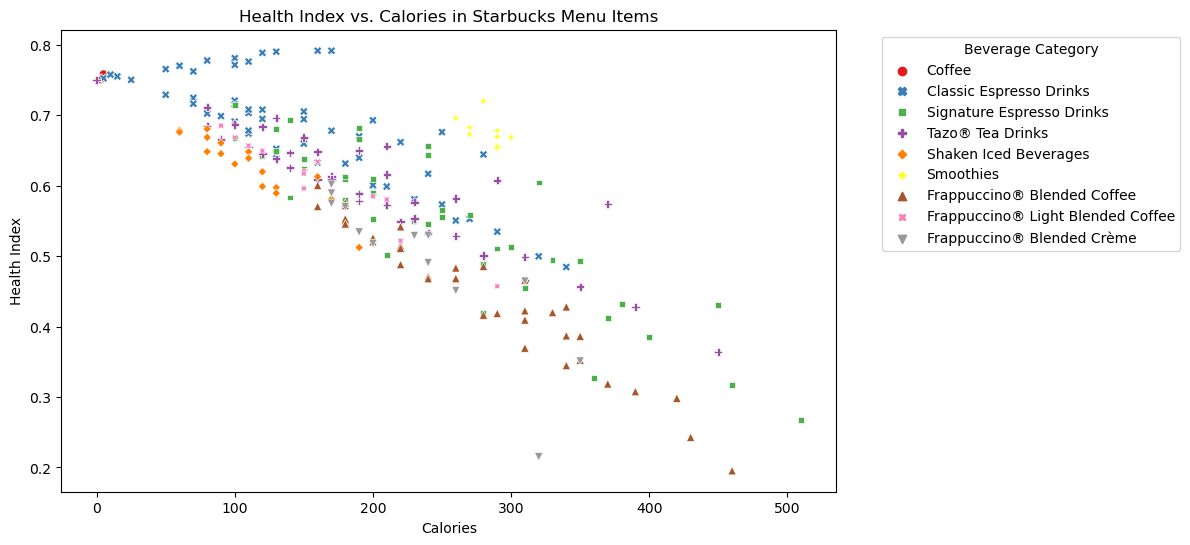

In [75]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Calories', y='Health Index', data=starbucks_data, hue='Beverage_category', style='Beverage_category', palette='Set1')
plt.title('Health Index vs. Calories in Starbucks Menu Items')
plt.xlabel('Calories')
plt.ylabel('Health Index')
plt.legend(title='Beverage Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Analysis Summary:

- **Nutritional Composition Overview:** Our initial exploration of the Starbucks menu revealed a wide range of nutritional values across different beverage categories. Specifically, we observed significant variability in calories, total fat, carbohydrates, protein, and sugar content. 

- **Calorie Distribution:** The histogram of calorie distribution indicated that a substantial portion of the menu items are on the lower end of the calorie spectrum, suggesting that there are numerous lower-calorie options available for health-conscious consumers.

- **Nutritional Content Comparison:** Through box plots, we compared the nutritional content across beverage categories, identifying categories with higher average total fat, carbohydrates, protein, and sugars. This comparison highlighted the diversity in nutritional content, pointing out categories that might be considered healthier or less healthy based on these metrics.

- **Health Index Creation:** We developed a Health Index based on calories, total fat, sugars, and protein to rank menu items from healthiest to least healthy. The Health Index revealed that items from the "Classic Espresso Drinks" category, particularly those labeled as "Skinny" or prepared with nonfat milk, ranked higher, indicating they are healthier choices.

### Recommendations:

1. **Health-Conscious Choices:** Customers looking to make healthier choices at Starbucks can opt for beverages from the "Classic Espresso Drinks" category, focusing on "Skinny" options or those made with nonfat milk. These options tend to have lower calories, fat, and sugars while providing a good amount of protein.

2. **Customization for Health:** Customers should take advantage of Starbucks' customization options to improve the nutritional profile of their drinks. Opting for alternative milks, reducing or eliminating added syrups, and choosing smaller sizes can significantly reduce calorie and sugar intake.

3. **Awareness of Nutritional Variability:** While some categories tend to be healthier on average, there is considerable variability within categories. Customers should review the nutritional information for specific items to make informed choices, as some items within generally healthier categories may still be high in calories, fat, or sugars.

4. **Incorporation of Protein:** For customers prioritizing protein intake, focusing on beverages with higher protein content can be beneficial. The Health Index highlighted several options with a good balance of lower calories and higher protein.

5. **Education and Tools:** Starbucks could consider developing tools or resources that allow customers to easily compare the nutritional content of menu items and customize their orders to fit their dietary preferences. This could enhance customer satisfaction and support health-conscious decision-making.

6. **Continued Analysis:** This analysis provides a snapshot of the Starbucks menu's nutritional content. Continuous monitoring and analysis are recommended as the menu evolves and new items are introduced. This will help maintain an up-to-date understanding of the healthiest options available.

### Conclusion:

Our analysis of the Starbucks menu has uncovered a variety of options catering to health-conscious consumers, with certain beverage categories offering particularly beneficial nutritional profiles. By making informed choices and utilizing customization options, customers can enjoy their favorite beverages in a healthier manner. Starbucks has the opportunity to support its customers in making these choices through the provision of educational resources and user-friendly nutritional information tools.